In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df =pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

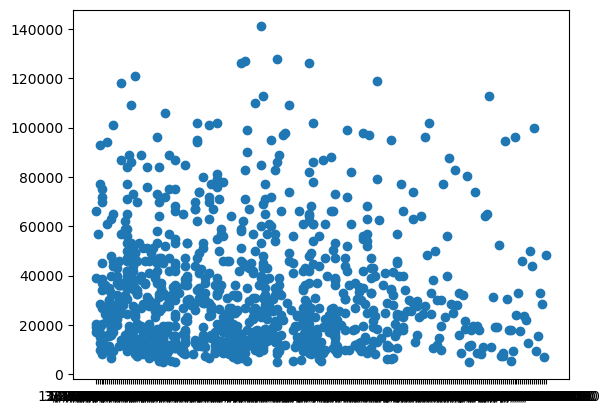

In [6]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

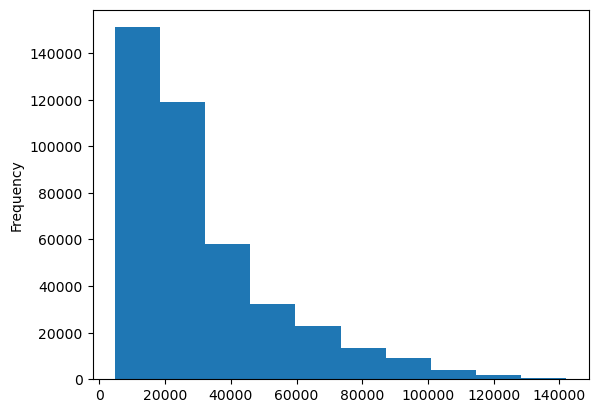

In [8]:
df.SalePrice.plot.hist()

In [9]:
df.saledate.dtype

dtype('O')

In [10]:
df=pd.read_csv("bluebook-for-bulldozers/Train.csv",low_memory=False,parse_dates=["saledate"])

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

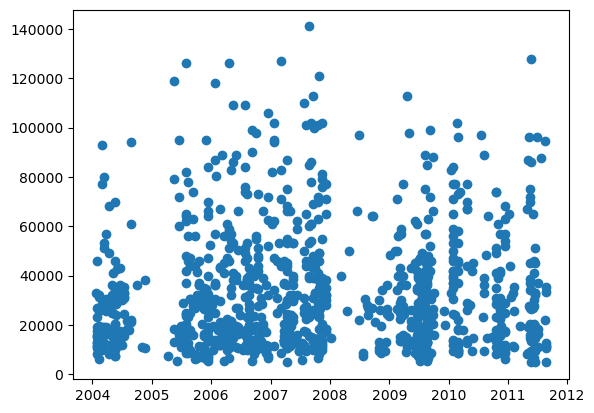

In [13]:
fig,ax=plt.subplots()
ax=plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [16]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [17]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [19]:
df_tmp=df.copy()

In [20]:
df_tmp["saleYear"] =df_tmp.saledate.dt.year
df_tmp["saleMonth"] =df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"]=df_tmp.saledate.dt.dayofyear


In [21]:
df_tmp.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [23]:
df_tmp.drop('saledate',axis=1,inplace=True)

In [24]:
df_tmp.state.value_counts()

state
Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska  

In [25]:
len(df_tmp)

401125

In [26]:
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor(n_jobs=-1,random_state=42)
#model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp["SalePrice"])

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-null   o

In [28]:
df_tmp['UsageBand'].dtype

dtype('O')

In [29]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [30]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [31]:
for label , contants in df_tmp.items():
    if pd.api.types.is_string_dtype(contants) :
     print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [32]:
random_dict={"key1":"value1",
              "key2": "value2" 
            }
for key , value in random_dict.items():
     print (f"the is key : {key}",
      f"the is value : {value}")

the is key : key1 the is value : value1
the is key : key2 the is value : value2


In [33]:
for label , contant in df_tmp.items():
    if pd.api.types.is_string_dtype(contant):
       df_tmp[label]= contant.astype("category").cat.as_ordered()

In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   object  
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  object  
 12  fiModelSeries             56908 non-null   object  
 13  fiModelDescriptor         719

In [35]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [36]:
df_tmp.state.value_counts()

state
Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska  

In [37]:
df_tmp.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [38]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

In [39]:
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv",index=False)


In [40]:
df_tmp=pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,416,12G,644,A66


In [41]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [42]:
for label , contant in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contant):
        print(label)
    

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [43]:
df_tmp.ModelID

0          8434
1          7110
2          3357
3          8247
4         10150
          ...  
401120     4102
401121     4875
401122     3170
401123    26456
401124     9580
Name: ModelID, Length: 401125, dtype: int64

In [44]:
for label , contant in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contant):
        if pd.isnull(contant).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(contant)
            df_tmp[label]=contant.fillna(contant.median())

In [45]:
hundreds=np.full(1000,100)
hundrenda_billon=np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundrenda_billon),np.median(hundreds),np.median(hundrenda_billon)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [46]:
for label,contanet in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contanet):
        if pd.isnull(contanet).sum():
            print(label)

In [124]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    380989
True      20136
Name: count, dtype: int64

In [48]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [49]:
for label ,contanet in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contanet):
        print (label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [50]:
pd.Categorical(df_tmp['UsageBand']).codes
#اذا كانت قيم مفقودة لقيم غير رقمية يجب اضافة واحد

array([-1, -1, -1, ..., -1, -1, -1], shape=(401125,), dtype=int8)

In [51]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content) :
        df_tmp[label+'_is_missing']=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1
        

In [52]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [53]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ..., 31, 31, 31], shape=(401125,), dtype=int8)

In [54]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(11), int8(40)
memory usage: 75.7 MB


In [55]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,False


In [56]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [57]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
1,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,...,True,True,True,True,True,True,True,True,True,True
2,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,...,True,True,True,True,True,True,True,True,True,True
3,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,...,True,True,True,True,True,True,True,True,False,False
4,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False


In [58]:
len(df_tmp)

401125

In [59]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [60]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
##تمت اضافة -1 بسبب كبرة البيانات
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp['SalePrice'])

CPU times: total: 31min 12s
Wall time: 9min 24s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875209731205072

In [62]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, Length: 401125, dtype: int64

In [63]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [64]:
df_val=df_tmp[df_tmp.saleYear==1999]
df_train=df_tmp[df_tmp.saleYear!=1999]
len(df_val),len(df_train)

(12793, 388332)

In [65]:
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((388332, 102), (388332,), (12793, 102), (12793,))

In [66]:
y_train

0          9500
1         24000
2         35000
3         19000
4         14000
          ...  
401120    13500
401121     9750
401122    14500
401123    12500
401124    11000
Name: SalePrice, Length: 388332, dtype: int64

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def rmsle (y_test,y_preads):
    """
    Caculates root mean squared log erorr between predictions and 
    true label
    """
    return np.sqrt(mean_squared_error(y_test,y_preads))

def show_score(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    score={"Training MAE":mean_absolute_error(y_train,train_preds),
          "valid MAE":mean_absolute_error(y_valid,val_preds),
          "Training RMSLE":rmsle(y_train,train_preds),
          "Valid RMMSLE":rmsle(y_valid,val_preds),
           "Trainging R^2":r2_score(y_train,train_preds),
           "valid R^2":r2_score(y_valid,val_preds)
          }
    return score
    


In [68]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [69]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 9s
Wall time: 23.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [70]:
(X_train.shape[0]*100)/1000000


38.8332

In [71]:
10000*100

1000000

In [72]:
show_score(model)

{'Training MAE': 5547.448226543266,
 'valid MAE': 6577.549175330259,
 'Training RMSLE': np.float64(8589.792671892537),
 'Valid RMMSLE': np.float64(9863.155228547012),
 'Trainging R^2': 0.8615877762237536,
 'valid R^2': 0.7869442399513983}

In [73]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features":[0.5,1,"sqrt","auto"],
    "max_samples":[10000]
}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 20.2 s
Wall time: 16.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [74]:
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 3}

In [75]:
show_score(rs_model)

{'Training MAE': 15336.758516406691,
 'valid MAE': 14428.656420108711,
 'Training RMSLE': np.float64(20608.728485549895),
 'Valid RMMSLE': np.float64(19248.980930227797),
 'Trainging R^2': 0.20326943526915442,
 'valid R^2': 0.18852148060150975}

In [76]:
%%time
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=15,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 22s
Wall time: 1min 48s


RandomForestRegressor(max_features=0.5, min_samples_split=15, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [77]:
show_score(ideal_model)

{'Training MAE': 3037.1884747161344,
 'valid MAE': 6086.813589904267,
 'Training RMSLE': np.float64(4796.743256655026),
 'Valid RMMSLE': np.float64(9162.97871602454),
 'Trainging R^2': 0.956837953286364,
 'valid R^2': 0.8161198289061806}

In [78]:
show_score(rs_model)

{'Training MAE': 15336.758516406691,
 'valid MAE': 14428.656420108711,
 'Training RMSLE': np.float64(20608.728485549895),
 'Valid RMMSLE': np.float64(19248.980930227797),
 'Trainging R^2': 0.20326943526915453,
 'valid R^2': 0.18852148060150986}

In [79]:
df_test=pd.read_csv("bluebook-for-bulldozers/Test.csv",
               low_memory=False,
                   parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [80]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [82]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [83]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [84]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        else:
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df


In [85]:
#def preprocess_data(df):
#    """
#    performs transformations on df reurns transformed df
#    """
#    df["saleYear"] =df.saledate.dt.year
# #   df["saleMonth"] =df.saledate.dt.month
#    df["saleDay"]=df.saledate.dt.day
#    df["saleDayofWeek"]=df.saledate.dt.dayofweek
#    df["saleDayofYear"]=df.saledate.dt.dayofyear
#    df.drop("saledate",axis=1,inplace=True)
#    for label,contanet in df.items():
#        if pd.api.types.is_numeric_dtype(contanet):
#            if pd.isnull(contanet).sum():
#                print("///////")
#                df[label+"_is_massing"]=pd.isnull(contanet)
#                df[label]=contanet.fillna(contanet.median)
#            if not pd.api.types.is_numeric_dtype(content):
#                df[label+"_is_massing"]=pd.isnull(contanet)
#                df[label]=pd.Categorical(contanet).codes+1
#                print("//*********")
#    return df


In [86]:
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [87]:
set(X_train.columns) - set(df_test.columns)


{'auctioneerID_is_missing'}

In [88]:
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [89]:
print(X_train.dtypes)
print("*************")
print(df_test.dtypes)


SalesID                           int64
MachineID                         int64
ModelID                           int64
datasource                        int64
auctioneerID                    float64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 102, dtype: object
*************
SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
auctioneerID_is_missing          bool
Length: 102, dtype: object


In [90]:
df_test = df_test[X_train.columns]
#سوينا هيك بسبب اختلاف ترتيب الاعمدة


In [91]:
test_preds=ideal_model.predict(df_test)
test_preds

array([18028.06147739, 16962.59790565, 51797.57201996, ...,
       13301.84037654, 18246.95752336, 27865.16458604], shape=(12457,))

In [92]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["Salesprice"]=test_preds
df_preds


,SalesID,Salesprice
0,1227829,18028.061477
1,1227844,16962.597906
2,1227847,51797.572020
3,1227848,70608.749264
4,1227863,58046.354432
...,...,...
12452,6643171,38215.335719
12453,6643173,13856.608398
12454,6643184,13301.840377
12455,6643186,18246.957523


In [93]:
df_preds.to_csv("bluebook-for-bulldozers/test_predicion.csv",index=False)

In [94]:
len(ideal_model.feature_importances_ )

102

In [95]:
X_train.shape

(388332, 102)

In [117]:
def plot_featres(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                     "features_importances":importances}.sort_values("features_importances",ascending=False)).reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")

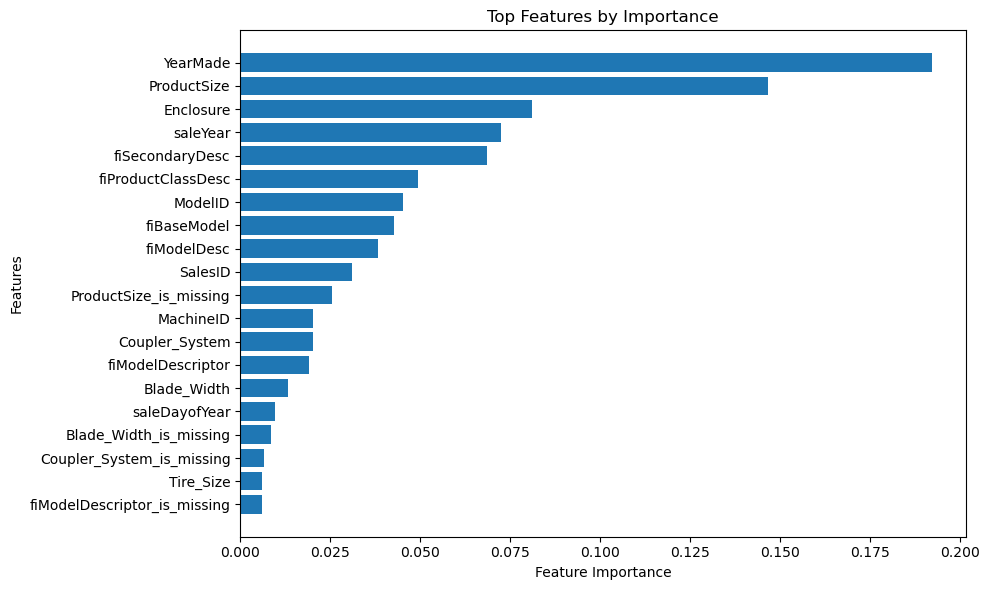

In [119]:
plot_features(X_train.columns, ideal_model.feature_importances_, n=20)


In [122]:
df["ProductSize"].value_counts()

ProductSize
Medium            62274
Large / Medium    49678
Small             26494
Mini              24840
Large             20975
Compact            6089
Name: count, dtype: int64